# Computer training

Baseline train Acc: 0.4504, test Acc: 0.4754


Epoch 1:   0%|          | 0/1 [00:00<?, ?batch/s]

Best test Acc: 0.9016
OrderedDict({'hidden.weight': tensor([[-0.9042, -0.0111,  1.8139,  1.3389,  3.6271, -5.0140,  3.0594,  2.7034,
         -1.9211],
        [-1.9493, -4.0434,  1.0944,  0.7783,  1.8009,  1.2137, -2.7837, -1.1911,
          0.9735],
        [ 0.4835,  0.2078,  7.1985, -0.4556, -0.6733, -0.6910,  0.8700,  2.5769,
          1.1245]]), 'hidden.bias': tensor([-5.1668, -4.0569, -1.7481]), 'out.weight': tensor([[-2.5093,  3.8774, -1.5757]]), 'out.bias': tensor([0.3664])})


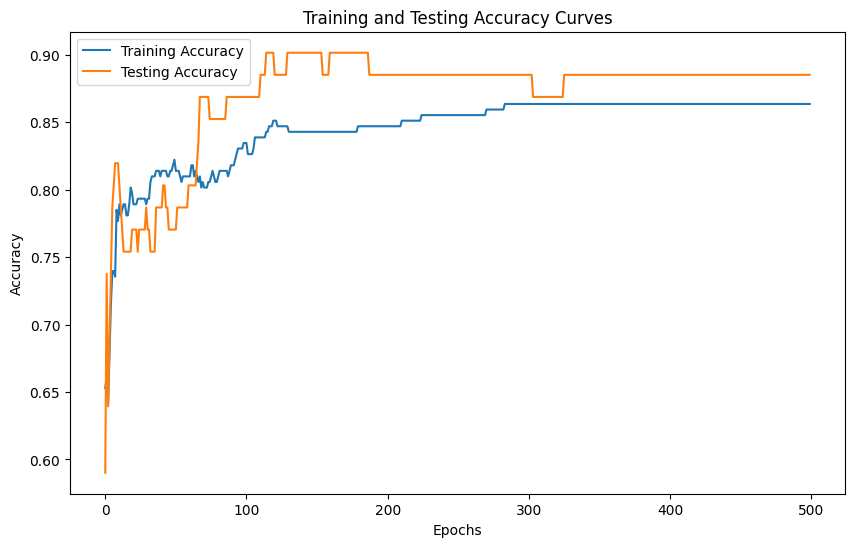

In [4]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import matplotlib.pyplot as plt
from copy import deepcopy

seed = 0
np.random.seed(seed)
torch.manual_seed(seed)

df = pd.read_csv('heart.csv')
data = df.iloc[:, 0:9].values
target = df.iloc[:, 9].values.reshape(-1, 1)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size=0.2, random_state=42)

# Convert to tensors
x_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Create data loader
train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=len(X_train), shuffle=True)

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(9, 3) 
        self.out = nn.Linear(3, 1)  
        self.custom_sigmoid = torch.sigmoid

    def forward(self, x):
        x = self.custom_sigmoid(self.hidden(1*x))
        x = torch.sigmoid(self.out(1*x))
        return x
    
def evaluate(model, X, y):
    with torch.no_grad():
        y_pred = model(X)
        y_pred = (y_pred > 0.5).float()
        acc = accuracy_score(y, y_pred)
    return acc

model = MLP()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  
loss_function = nn.MSELoss() 

# Training loop
losses = []
train_accs = []
test_accs = []
num_epochs = 500 

acc_train = evaluate(model, x_train, y_train)
acc_test = evaluate(model, x_test, y_test)
print(f"Baseline train Acc: {acc_train:.4f}, test Acc: {acc_test:.4f}")
best_acc = acc_test
model_parameters = None

for epoch in range(num_epochs):
    with tqdm(train_loader, unit="batch", leave=False) as tepoch:
        for inputs, targets in tepoch:
            tepoch.set_description(f"Epoch {epoch+1}")
            
            optimizer.zero_grad()
            outputs = model(inputs)
            model_loss = loss_function(outputs, targets)
            loss = model_loss
            loss.backward()
            optimizer.step()
            
            losses.append(loss.item())
            tepoch.set_postfix(model_loss=model_loss.item())

        acc_train = evaluate(model, x_train, y_train)
        acc_test = evaluate(model, x_test, y_test)
        train_accs.append(acc_train)
        test_accs.append(acc_test)
        if acc_test > best_acc:
            best_acc = acc_test
            model_parameters = deepcopy(model.state_dict())

print(f"Best test Acc: {best_acc:.4f}")
print(model_parameters)

# Save training logs
training_logs = pd.DataFrame({
    'train_acc': train_accs,
    'test_acc': test_accs
})
training_logs.to_csv('computer_training_logs.csv', index=False)

# Plot training and testing accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(train_accs, label='Training Accuracy')
plt.plot(test_accs, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy Curves')
plt.legend()
plt.show()

# Synapse training

Baseline train Acc: 0.3802, test Acc: 0.2787


  0%|          | 0/1 [00:00<?, ?batch/s]

Best test Acc: 0.8361
Best model parameters:
OrderedDict({'hidden.weight': tensor([[ 0.2400,  0.4500, -0.0000, -0.2000, -0.3000, -0.2100,  0.3200,  0.5600,
         -0.2700],
        [-0.2500, -0.4300, -0.0800, -0.2400, -0.0200,  0.2200, -0.3600, -0.2300,
          0.5500],
        [ 0.1400,  0.2100,  0.4500,  0.3200, -0.3900, -0.1200,  0.3100,  0.4000,
         -0.0600]]), 'hidden.bias': tensor([-0.4700, -0.1400, -0.3200]), 'out.weight': tensor([[-0.3700,  0.8600, -0.0900]]), 'out.bias': tensor([-0.0600])})

Epoch 70 results:
Test Accuracy: 0.7869
Model parameters:
OrderedDict({'hidden.weight': tensor([[-0.6500,  0.5100, -0.1200, -0.8400, -0.5300, -0.2400,  1.1600,  0.5300,
         -0.4400],
        [-0.6700, -0.4800,  0.1600,  0.0000, -0.4900,  0.2300, -0.7400, -0.7600,
          1.4600],
        [ 0.7600,  0.2900,  0.4500,  0.2700, -0.5400, -0.5000,  0.3100,  0.1600,
          0.6300]]), 'hidden.bias': tensor([0.1800, 0.6400, 0.6100]), 'out.weight': tensor([[-1.0800,  1.1300, -0.78

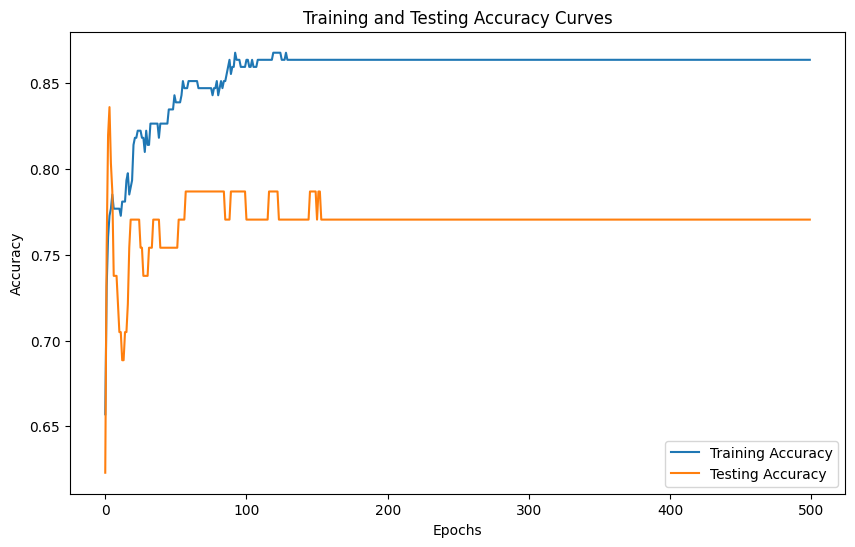

In [32]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import matplotlib.pyplot as plt
from copy import deepcopy

seed = 0
np.random.seed(seed)
torch.manual_seed(seed)


df = pd.read_csv('heart.csv')
data = df.iloc[:, 0:9].values
target = df.iloc[:, 9].values.reshape(-1, 1)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size=0.2, random_state=42)

# Convert to tensors
x_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Create data loader
train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=len(X_train), shuffle=True)



class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(9, 3) 
        self.out = nn.Linear(3, 1)  
        self.custom_sigmoid = torch.sigmoid

    def forward(self, x):
        x = self.custom_sigmoid(self.hidden(5*x))
        x = torch.sigmoid(self.out(2*x)) # please note that a data scaling happens here
        return x
    

def l2_regularization(model, lambda_l2):
    l2 = 0
    for param in model.parameters():
        l2 += torch.norm(param)**2
    return lambda_l2 * l2

def evaluate(model, X, y):
    with torch.no_grad():
        y_pred = model(X)
        y_pred = (y_pred > 0.5).float()
        acc = accuracy_score(y, y_pred)
    return acc


model = MLP()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)  
lambda_l2 = 0.0005
loss_function = nn.MSELoss() 


# Training loop
losses = []
train_accs = []
test_accs = []
num_epochs = 500 
all_model_parameters = []  # To store model parameters for each epoch

acc_train = evaluate(model, x_train, y_train)
acc_test = evaluate(model, x_test, y_test)
print(f"Baseline train Acc: {acc_train:.4f}, test Acc: {acc_test:.4f}")
best_acc = acc_test
best_model_parameters = None

for epoch in range(num_epochs):
    with tqdm(train_loader, unit="batch", leave=False) as tepoch:
        for inputs, targets in tepoch:
            tepoch.set_description(f"Epoch {epoch+1}")
            
            optimizer.zero_grad()
            outputs = model(inputs)
            model_loss = loss_function(outputs, targets)
            regularization_loss = l2_regularization(model, lambda_l2)
            loss = model_loss + regularization_loss
            loss.backward()
            optimizer.step()
            
            losses.append(loss.item())
            tepoch.set_postfix(model_loss=model_loss.item(), regularization_loss=regularization_loss.item())

        # Quantize model parameters
        model_quantized = MLP()
        model_quantized.load_state_dict(model.state_dict())
        for param in model_quantized.parameters():
            param.data = torch.round(param.data * 100) / 100  # Round to two decimal places

        acc_train = evaluate(model_quantized, x_train, y_train)
        acc_test = evaluate(model_quantized, x_test, y_test)
        train_accs.append(acc_train)
        test_accs.append(acc_test)
        all_model_parameters.append(deepcopy(model_quantized.state_dict()))  # Save quantized model parameters
        if acc_test > best_acc:
            best_acc = acc_test
            best_model_parameters = deepcopy(model_quantized.state_dict())

print(f"Best test Acc: {best_acc:.4f}")
print("Best model parameters:")
print(best_model_parameters)

# Output test accuracy and model parameters for specified epoch
specified_epoch = 70  # You can change this value to view results for different epochs
if specified_epoch <= num_epochs:
    print(f"\nEpoch {specified_epoch} results:")
    print(f"Test Accuracy: {test_accs[specified_epoch-1]:.4f}")
    print("Model parameters:")
    print(all_model_parameters[specified_epoch-1])
else:
    print(f"Specified epoch {specified_epoch} exceeds the total number of epochs {num_epochs}")

# Save training logs
training_logs = pd.DataFrame({
    'train_acc': train_accs,
    'test_acc': test_accs
})
training_logs.to_csv('synapse_training_logs.csv', index=False)

# Plot training and testing accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(train_accs, label='Training Accuracy')
plt.plot(test_accs, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy Curves')
plt.legend()
plt.show()